In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

In [3]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.shape

(891, 12)

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
train_df.drop(columns=['Cabin'], inplace=True)

In [39]:
train_df['Fare'] = train_df['Fare'].fillna(train_df['Fare'].mean(skipna=True))
train_df.dropna(inplace=True)
train_df.reset_index(drop=True,inplace=True)

In [206]:
test_df.isnull().sum()

PassengerId                         0
Pclass                              0
Name                                0
Sex                                 0
Age                                86
SibSp                               0
Parch                               0
Ticket                              0
Fare                                1
Cabin                             327
Embarked                            0
Child                               0
First Class                         0
Third Class                         0
First Class Women and Children      0
dtype: int64

In [40]:
test_df = test_df.drop(columns=['Cabin'])
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean(skipna=True))
test_df.reset_index(drop=True,inplace=True)

### Exploratory Data Analysis

In [13]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [15]:
train_df.groupby('Pclass')['Survived'].sum()

Pclass
1    120
2     83
3     85
Name: Survived, dtype: int64

In [16]:
train_df['Survived'].value_counts()

Survived
0    424
1    288
Name: count, dtype: int64

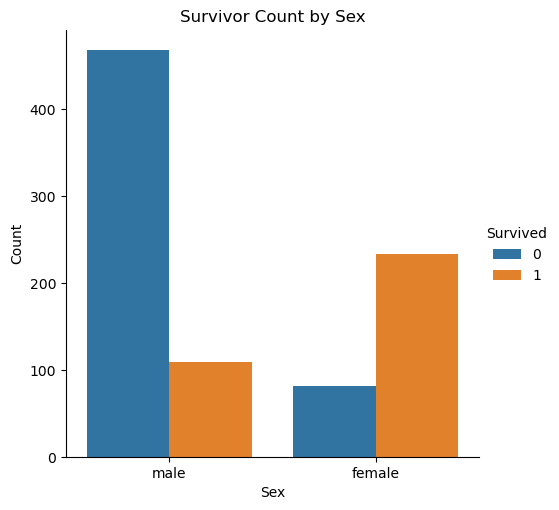

In [10]:
sns.catplot(x='Sex', data = train_df, hue='Survived', kind='count')
plt.title('Survivor Count by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

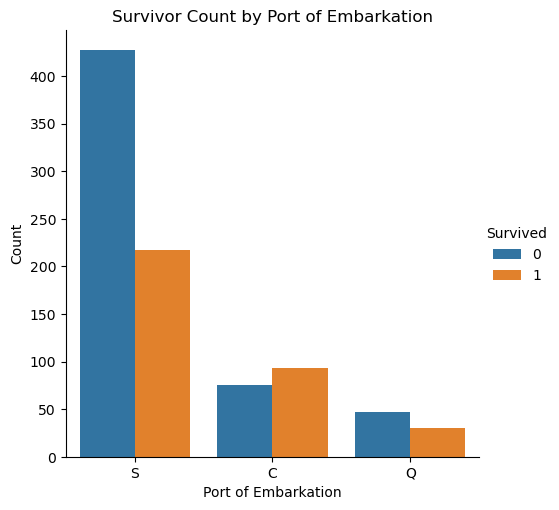

In [11]:
sns.catplot(x='Embarked', data = train_df, hue='Survived', kind='count')
plt.title('Survivor Count by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.show()

### Feature Engineering

In [21]:
train_df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
train_df['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)

In [22]:
train_df['Child'] = np.where(train_df['Age'] <= 14, 1, 0)
test_df['Child'] = np.where(test_df['Age'] <= 14, 1, 0)

train_df['First Class'] = np.where(train_df['Pclass'] == 1, 1, 0)
test_df['First Class'] = np.where(test_df['Pclass'] == 1, 1, 0)

train_df['Third Class'] = np.where(train_df['Pclass'] == 3, 1, 0)
test_df['Third Class'] = np.where(test_df['Pclass'] == 3, 1, 0)

train_df['First Class Women and Children'] = np.where((train_df['Pclass'] == 1) & (train_df['Sex'] == 1) | (train_df['Child'] == 1), 1, 0)
test_df['First Class Women and Children'] = np.where((test_df['Pclass'] == 1) & (test_df['Sex'] == 1) | (test_df['Child'] == 1), 1, 0)

train_df['Third Class Men'] = np.where((train_df['Pclass'] == 3) & (train_df['Sex'] == 0), 1, 0)
test_df['Third Class Men'] = np.where((test_df['Pclass'] == 3) & (test_df['Sex'] == 0), 1, 0)

In [23]:
df_num = train_df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Child', 'First Class', 'Third Class', 
                   'First Class Women and Children', 'Third Class Men']]
df_num.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Child,First Class,Third Class,First Class Women and Children,Third Class Men
Survived,1.000000,-0.356462,0.536762,-0.082446,-0.015523,0.095265,0.266100,-0.181979,0.127656,0.297908,-0.335364,0.413827,-0.384676
Pclass,-0.356462,1.000000,-0.150826,-0.365902,0.065187,0.023666,-0.552893,0.244145,0.159569,-0.875443,0.906051,-0.286750,0.674569
Sex,0.536762,-0.150826,1.000000,-0.099037,0.106296,0.249543,0.182457,-0.109639,0.093912,0.107152,-0.158446,0.432266,-0.561377
Age,-0.082446,-0.365902,-0.099037,1.000000,-0.307351,-0.187896,0.093143,-0.032565,-0.575580,0.344976,-0.309944,-0.331000,-0.160684
SibSp,-0.015523,0.065187,0.106296,-0.307351,1.000000,0.383338,0.139860,0.033064,0.493156,-0.036512,0.077060,0.377167,-0.019100
Parch,0.095265,0.023666,0.249543,-0.187896,0.383338,1.000000,0.206624,0.011803,0.369232,-0.013514,0.027750,0.287685,-0.152792
Fare,0.266100,-0.552893,0.182457,0.093143,0.139860,0.206624,1.000000,-0.283510,-0.017370,0.596792,-0.402219,0.366790,-0.314429
Embarked,-0.181979,0.244145,-0.109639,-0.032565,0.033064,0.011803,-0.283510,1.000000,-0.004961,-0.311450,0.135655,-0.195768,0.144510
Child,0.127656,0.159569,0.093912,-0.575580,0.493156,0.369232,-0.017370,-0.004961,1.000000,-0.153913,0.132128,0.652056,-0.003411
First Class,0.297908,-0.875443,0.107152,0.344976,-0.036512,-0.013514,0.596792,-0.311450,-0.153913,1.000000,-0.588670,0.348744,-0.438274


### Model Building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [25]:
X = train_df[['Pclass', 'Sex', 'Fare', 'First Class', 'Third Class', 'First Class Women and Children', 'Third Class Men']].values
y = train_df['Survived'].values

In [26]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [28]:
LR_model = LogisticRegressionCV(cv=5, random_state=42)
LR_model.fit(X_train, y_train)

LogisticRegressionCV(cv=5, random_state=42)

In [29]:
y_hat = LR_model.predict(X_test)
accuracy_score(y_test, y_hat)

0.8089887640449438

In [30]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_hat_DT = DT_model.predict(X_test)
accuracy_score(y_test, y_hat_DT)

0.8146067415730337

In [32]:
RFC = RandomForestClassifier(n_estimators = 10)
RFC.fit(X_train, y_train)
y_hat_RFC = RFC.predict(X_test)
accuracy_score(y_test, y_hat_RFC)

0.8202247191011236

In [33]:
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(X_train, y_train)
y_hat_KNN = KNN.predict(X_test)
accuracy_score(y_test, y_hat_KNN)

0.8033707865168539

In [35]:
test_df['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
test_df['Embarked'].replace(['C', 'Q', 'S'], [0, 1, 2], inplace=True)

In [36]:
test_df_X = test_df[['Pclass', 'Sex', 'Fare', 'First Class', 'Third Class', 'First Class Women and Children', 'Third Class Men']].values
predicted_values = DT_model.predict(test_df_X)

In [37]:
test_df['Survived'] = predicted_values
final_submission = test_df[['PassengerId', 'Survived']]

In [38]:
final_submission.to_csv('titanic_submission.csv', index=False)